In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [2]:
ds = xr.open_mfdataset('/home/averstyn/VIIRS_date/*.nc')
min_lon = -120
max_lon = -70
min_lat = 23
max_lat = 50
cropped_ds = ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon))
cropped_ds

<xarray.Dataset>
Dimensions:       (lon: 1001, lat: 541, time: 357)
Coordinates:
  * lon           (lon) float32 -120.0 -119.9 -119.9 ... -70.1 -70.05 -70.0
  * lat           (lat) float32 23.0 23.05 23.1 23.15 ... 49.85 49.9 49.95 50.0
  * time          (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    AOD550        (time, lat, lon) float32 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AE            (time, lat, lon) float32 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AOD550_count  (time, lat, lon) float64 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AE_count      (time, lat, lon) float64 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
Attributes:
    dataset_name:        viirs_eps_npp_aod_0.100_deg_20200101.nc
    title:               NOAA Enterprise L3 Aerosol Optical Depth
    spatial_resolution:   0.10 degree
    processing_level:    National Oceanic and Atmospheric Administration (NOA...
    Conventions:         CF-1.6
    instrument_name:     VIIRS
    satellite_name:      Suomi NPP

In [3]:
ds_month = cropped_ds.groupby('time.month').mean()
ds_month

<xarray.Dataset>
Dimensions:       (lon: 1001, lat: 541, month: 12)
Coordinates:
  * lon           (lon) float32 -120.0 -119.9 -119.9 ... -70.1 -70.05 -70.0
  * lat           (lat) float32 23.0 23.05 23.1 23.15 ... 49.85 49.9 49.95 50.0
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    AOD550        (month, lat, lon) float32 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AE            (month, lat, lon) float32 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AOD550_count  (month, lat, lon) float64 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>
    AE_count      (month, lat, lon) float64 dask.array<chunksize=(1, 541, 1001), meta=np.ndarray>

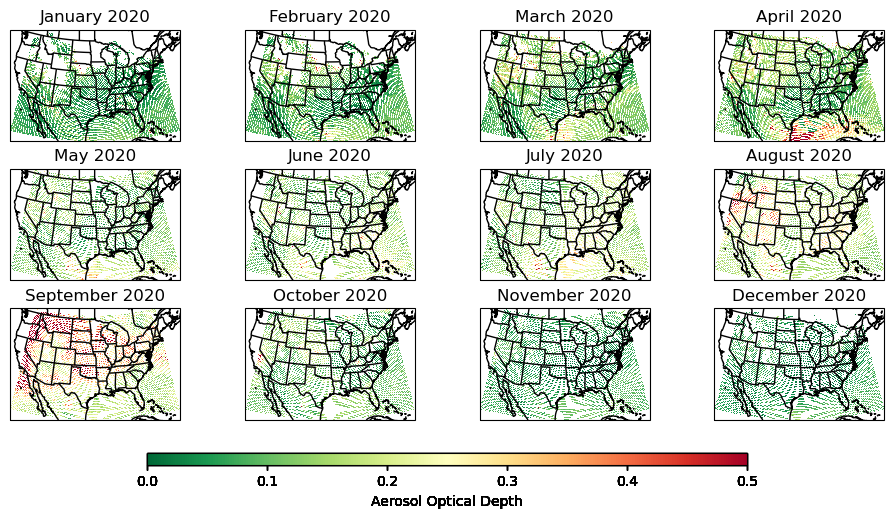

In [11]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
extent = [-120,-70,23,50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon,central_lat)},
                        figsize=(10,6))
axs = axs.flatten()
states = feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')

for i in range(1,13):
    data = ds_month['AOD550'].sel(month=i)
    data_undask = data.load()
    cs=axs[i-1].pcolormesh(data_undask['lon'],data_undask['lat'],data_undask,
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',vmin=0,vmax=0.5)
    axs[i-1].coastlines(zorder=100)
    axs[i-1].add_feature(feature.BORDERS)
    axs[i-1].add_feature(states)
    axs[i-1].set_title(str(months[i-1])+' 2020')
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Aerosol Optical Depth')
